# Prueba Claro
## Frank Montenegro - frandak2@gmail.com

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from libpysal.cg import alpha_shape_auto
# from libpysal.weights.distance import get_points_array
# import libpysal
import esda

In [2]:
# import os
g = os.getcwd()
g
path = r'D:\repos\GEO_CLARO'
os.chdir(path)

In [3]:
# points_late = gpd.read_file('data/points_ok/late_bgt.shp')
# points_late.head(5)


,FECHA,TEST_ID,N_OPERADOR,DOWNLOAD_M,UPLOAD_MBP,CLASS_LATE,localidad,geometry
0,2021-01-28,6978771403,4,10.410156,0.640625,0,ANTONIO NARIÑO,POINT (-74.09600 4.58700)
1,2021-01-19,6945885369,4,10.294922,4.988281,0,ANTONIO NARIÑO,POINT (-74.12100 4.59200)
2,2021-01-08,6907797685,4,28.707031,4.711914,0,ANTONIO NARIÑO,POINT (-74.10000 4.59000)
3,2021-01-21,6953823661,4,53.502930,7.201172,0,ANTONIO NARIÑO,POINT (-74.09500 4.58500)
4,2021-01-21,6952553476,4,26.608398,6.316406,0,ANTONIO NARIÑO,POINT (-74.12100 4.59300)


In [6]:
points_late['MES'] = pd.DatetimeIndex(points_late['FECHA']).month_name()
points_late['MES'] = pd.Categorical(points_late['MES'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September'])

In [7]:
OP3 = points_late[points_late.N_OPERADOR==3]
OP3['COUNT'] = 1


C:\Users\FrankHurtado\Miniconda3\envs\geods\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [8]:
df = pd.pivot_table(OP3, values='COUNT',columns='MES',index='localidad', aggfunc=np.sum).reset_index()
df

MES,localidad,January,February,March,April,May,June,July,August,September
0,ANTONIO NARIÑO,110,116,97,74,214,228,249,219,163
1,BARRIOS UNIDOS,820,811,836,819,1108,943,1186,1247,1073
2,BOSA,444,842,714,614,377,313,384,380,359
3,CANDELARIA,354,15,426,1549,835,666,639,625,485
4,CHAPINERO,10940,8047,6764,6388,6415,5226,6165,7307,6084
5,ENGATIVA,3171,6430,6176,6531,7192,7770,8050,8263,5928
6,FONTIBON,473,660,562,438,539,808,723,814,606
7,KENNEDY,1551,2083,1461,1410,1399,1016,1002,1159,1088
8,LOS MARTIRES,243,254,143,168,309,441,411,518,416
9,PUENTE ARANDA,487,381,391,268,461,712,2067,2680,2457


In [9]:
localidades = gpd.read_file('data\localidades\localidades_data.shp') #leemos el shape de localiades enriquecido
localidades = localidades.rename(columns={'NOMBRE':'localidad'})
gdf = df.merge(localidades[['localidad','geometry']], how='inner', on='localidad')
gdf

,localidad,January,February,March,April,May,June,July,August,September,geometry
0,ANTONIO NARIÑO,110,116,97,74,214,228,249,219,163,"POLYGON ((-74.13075 4.59335, -74.12917 4.59327..."
1,BARRIOS UNIDOS,820,811,836,819,1108,943,1186,1247,1073,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,BOSA,444,842,714,614,377,313,384,380,359,"POLYGON ((-74.18567 4.64705, -74.18480 4.64497..."
3,CANDELARIA,354,15,426,1549,835,666,639,625,485,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
4,CHAPINERO,10940,8047,6764,6388,6415,5226,6165,7307,6084,"POLYGON ((-74.05725 4.68684, -74.05220 4.68590..."
5,ENGATIVA,3171,6430,6176,6531,7192,7770,8050,8263,5928,"POLYGON ((-74.12738 4.73731, -74.12742 4.73885..."
6,FONTIBON,473,660,562,438,539,808,723,814,606,"POLYGON ((-74.15547 4.71798, -74.15478 4.71764..."
7,KENNEDY,1551,2083,1461,1410,1399,1016,1002,1159,1088,"POLYGON ((-74.15857 4.66274, -74.15845 4.66267..."
8,LOS MARTIRES,243,254,143,168,309,441,411,518,416,"POLYGON ((-74.07283 4.61542, -74.07311 4.61480..."
9,PUENTE ARANDA,487,381,391,268,461,712,2067,2680,2457,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053..."


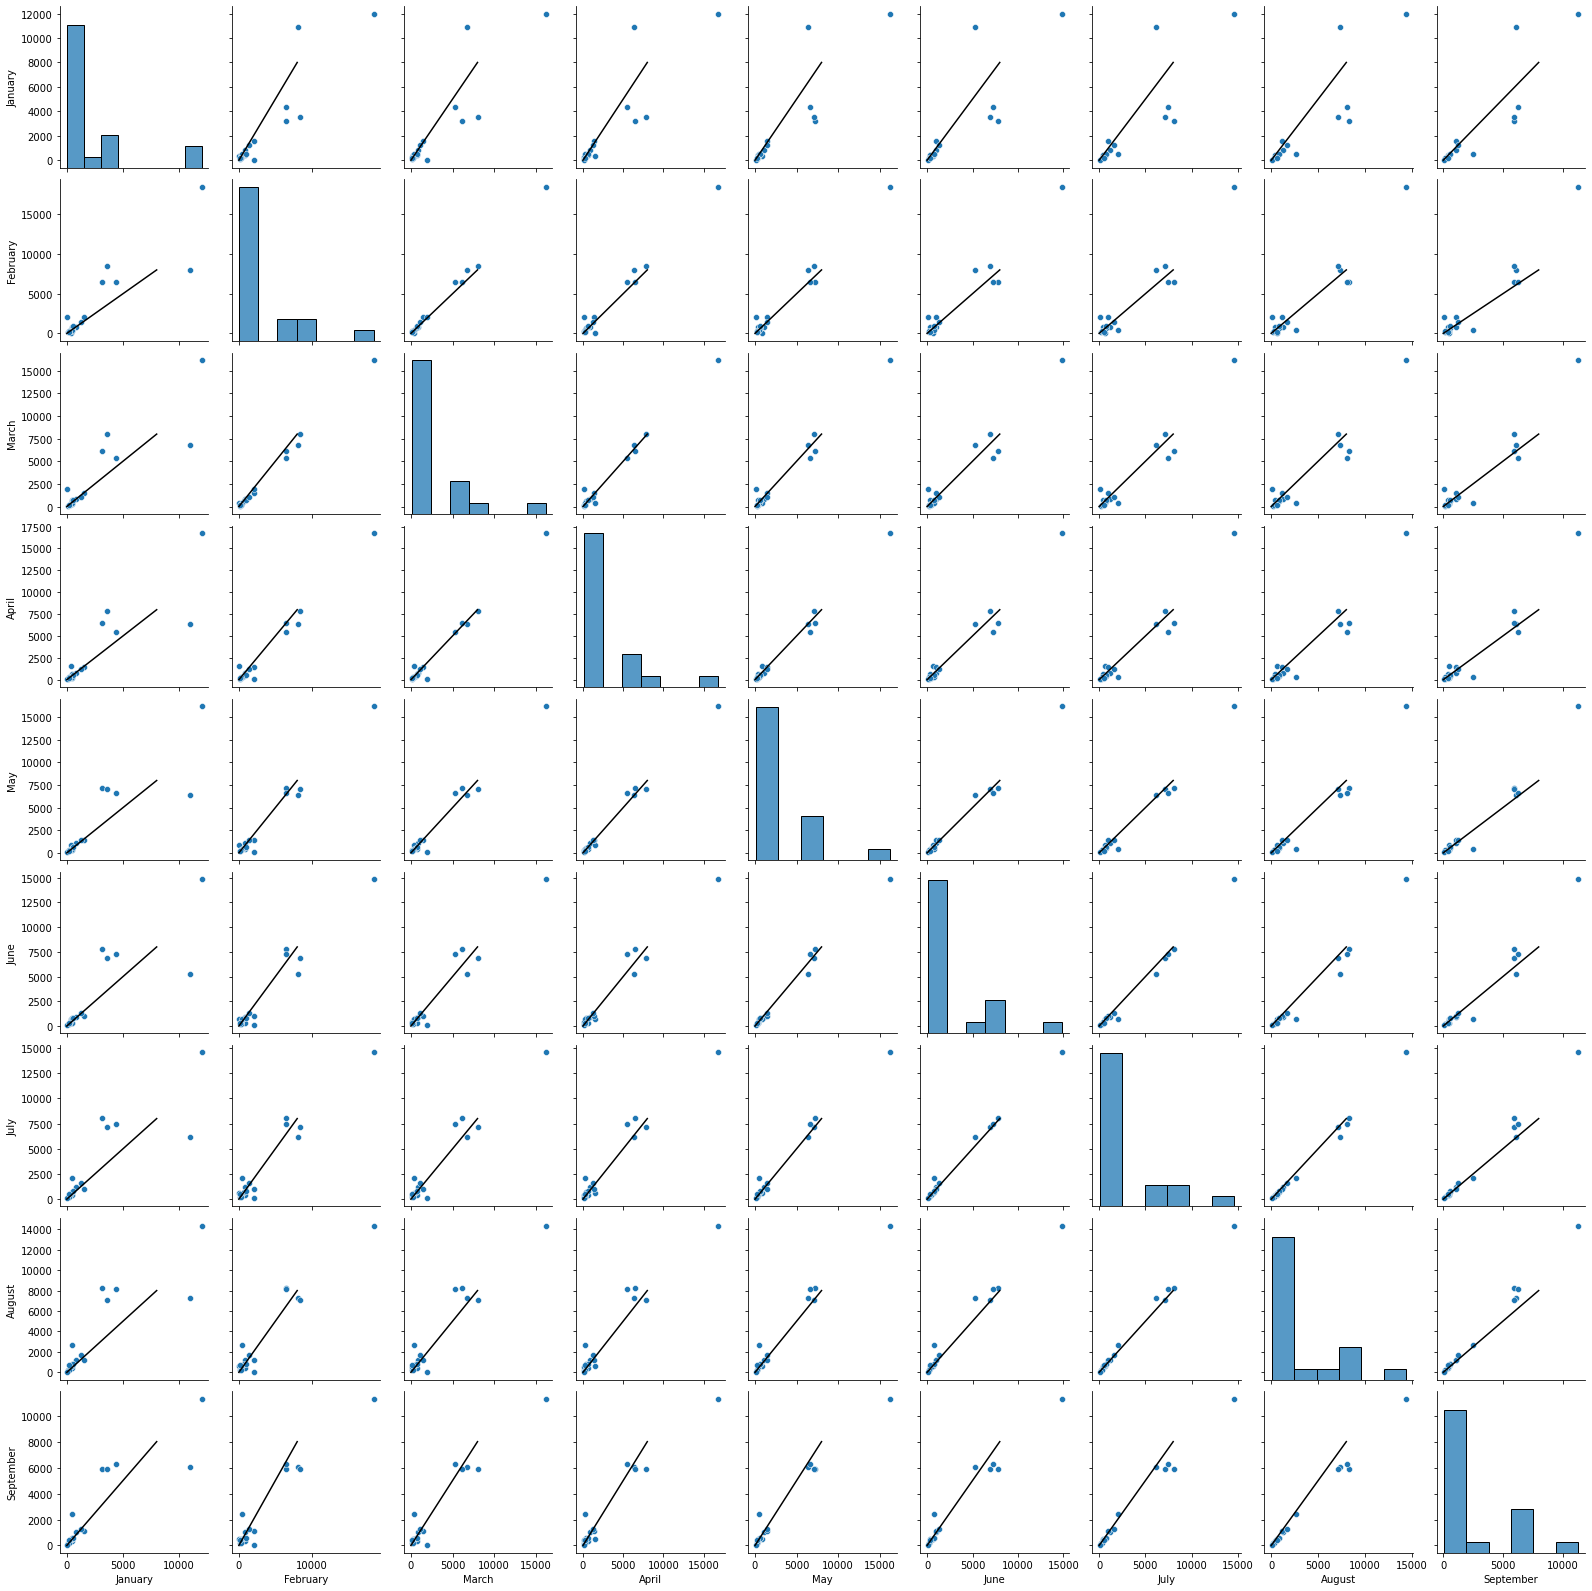

In [12]:
import seaborn as sns
facets = sns.pairplot(data=gdf)
facets.map_offdiag(lambda *arg, **kw: plt.plot((0,8000),(0,8000), color='k'))

In [10]:
new_df = gdf.drop(columns=['localidad','geometry'])
new_df

,January,February,March,April,May,June,July,August,September
0,110,116,97,74,214,228,249,219,163
1,820,811,836,819,1108,943,1186,1247,1073
2,444,842,714,614,377,313,384,380,359
3,354,15,426,1549,835,666,639,625,485
4,10940,8047,6764,6388,6415,5226,6165,7307,6084
5,3171,6430,6176,6531,7192,7770,8050,8263,5928
6,473,660,562,438,539,808,723,814,606
7,1551,2083,1461,1410,1399,1016,1002,1159,1088
8,243,254,143,168,309,441,411,518,416
9,487,381,391,268,461,712,2067,2680,2457


# Autocorrelacion espacial global 

In [11]:
gdf = gpd.GeoDataFrame(gdf,crs="EPSG:4326")
import libpysal as lp
w = lp.weights.Queen.from_dataframe(gdf)### Calculo matrix de pesos usan la configuracion tipo reina, aqui calcula los pesos en todas las direcciones
w.transform = 'R' #standarizacion de la matriz de pesos

In [12]:
import esda
np.random.seed(1)
cor_moran = []
for col in new_df.columns:
    corI = esda.moran.Moran(gdf[col], w)
    cor_moran.append([col,corI.I,corI.p_norm , corI.z_norm])
cor_moran = pd.DataFrame(cor_moran)
cor_moran.columns = ['MES','COR_MORAN-I','valor_P','Z_score']
cor_moran

,MES,COR_MORAN-I,valor_P,Z_score
0,January,0.332082,0.012798,2.489345
1,February,0.265552,0.038488,2.069617
2,March,0.264602,0.039053,2.063625
3,April,0.270730,0.035528,2.102283
4,May,0.335603,0.012020,2.511560
5,June,0.353730,0.008642,2.625914
6,July,0.373520,0.005946,2.750765
7,August,0.400080,0.003519,2.918328
8,September,0.392985,0.004059,2.873571


(<Figure size 720x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Reference Distribution'}, xlabel='Moran I: 0.39', ylabel='Density'>,
        <AxesSubplot:title={'center':'Moran Scatterplot (0.39)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

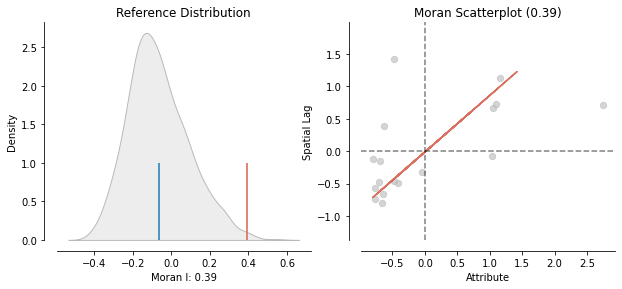

In [13]:
from splot.esda import plot_moran
plot_moran(corI)

## outocorrelacion - MORAN-I - LOCALIDADES
### - el mes de mayor outocorrelacion es AGOSTO y SEPTIEMBRE con 0.42, lo que nos indica que hay un agrupamiento de datos espaciales en este mes por localidad. 
### - la correlacion aumenta con el paso del tiempo confirmando lo que habiamos evidenciado anteriormente de como el operador 3 se va ranqueando como el mejor operador con el paso de los meses.
## Valor P y Z score
### - Todos meses rechazan la H0, afirmando que hay patron de distribucion de puntos en las localidades de bogota por mes


## PODEMOS REPLICAR ESTE ANALISIS POR BARRIO y para los demas operadores, haciendo un conteo de puntos por barrios o manzana, lo mas probable es que esta correlacion aumente ya que la matrix de pesos tendra informacion mas detallada.

# Autocorrelacion spacial local

In [17]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

In [18]:
np.random.seed(1)
# we choose an adaptive kernel by setting fixed = False
# the variable 'k' determines the number of neighbours to be considred while calculating the kerel threshold using knn function
# I am using 'gaussian' kernel
# w = weights.Kernel.from_dataframe(gdf, k=4, fixed = False, function = 'gaussian')
# w.transform = 'r'
y = gdf.September.values

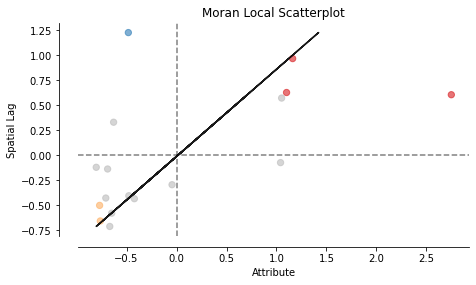

In [19]:
moran_loc = Moran_Local(y, w )
fig, ax = moran_scatterplot(moran_loc,p = 0.05)
plt.show()

<AxesSubplot:ylabel='Density'>

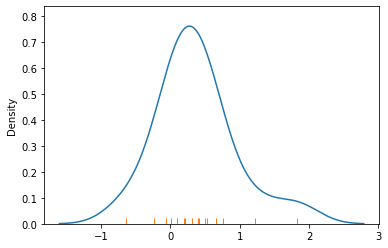

In [20]:
import seaborn as sns
ax = sns.kdeplot(moran_loc.Is)
sns.rugplot(moran_loc.Is, ax=ax)

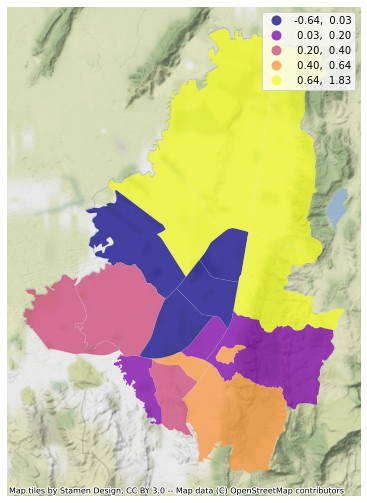

In [21]:
import contextily   
f, ax = plt.subplots(1, figsize=(9,9))
gdf['Is'] = moran_loc.Is
gdf.plot(column='Is', cmap='plasma', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True,ax=ax);
contextily.add_basemap(ax, 
                       crs=gdf.crs, 
                       source=contextily.providers.Stamen.TerrainBackground
                      )
ax.set_axis_off()

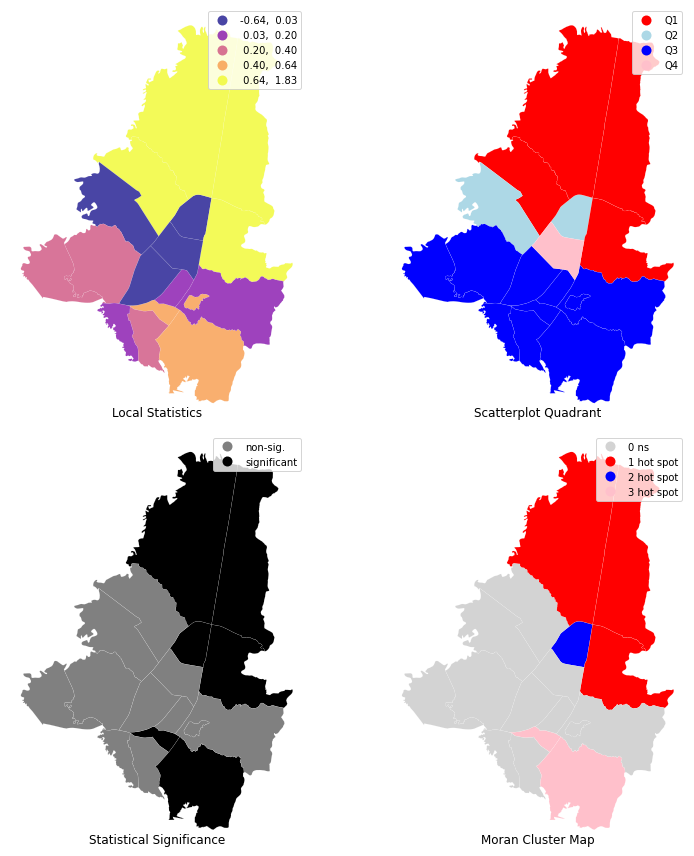

In [27]:
from matplotlib import colors
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

                    # Subplot 1 #
ax = axs[0]
gdf.plot(column='Is', cmap='plasma', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0.1, alpha=0.75, legend=True, ax=ax)

                    # Subplot 2 #
ax = axs[1]
q_labels = ['Q1', 'Q2', 'Q3', 'Q4']
labels = [q_labels[i-1] for i in moran_loc.q]
hmap = colors.ListedColormap([ 'red', 'lightblue', 'blue', 'pink'])
gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

                    # Subplot 3 #

ax = axs[2]
sig = 1 * (moran_loc.p_sim < 0.05)
hmap = colors.ListedColormap(['grey','black'])
labels = ['non-sig.', 'significant'] 
labels = [labels[i] for i in sig]
gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

                       
                    # Subplot 4 #
ax = axs[3]
hotspot1 = 1 * (sig * moran_loc.q==1)
hotspot3 = 3 * (sig * moran_loc.q==3)
hotspot2 = 2 * (sig * moran_loc.q==2)
hotspot4 = 4 * (sig * moran_loc.q==4)
spots = hotspot1 + hotspot2 + hotspot3 + hotspot4
spot_labels = [ '0 ns', '1 hot spot', '2 hot spot', '3 hot spot', '4 hot spot']
labels = [spot_labels[i] for i in spots]
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])

gdf.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(['Local Statistics', 
                  'Scatterplot Quadrant', 
                  'Statistical Significance', 
                  'Moran Cluster Map'][i], y=0)

f.tight_layout()

# Display the figure
plt.show()

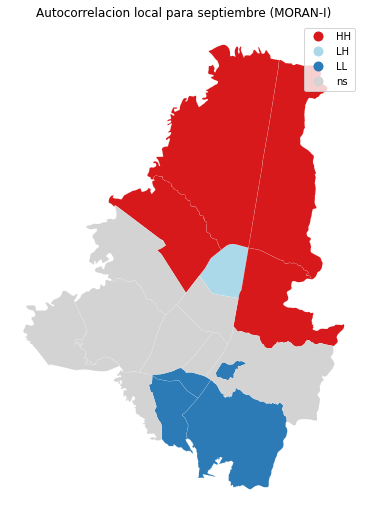

In [28]:
from splot.esda import lisa_cluster, plot_local_autocorrelation

lisa_cluster(moran_loc = moran_loc, gdf = gdf.copy(),p=0.1, figsize = (9,9) ) #Indicador Local de Asociación Espacial (LISA)
plt.title('Autocorrelacion local para septiembre (MORAN-I)')
plt.show()
# gdf.info()

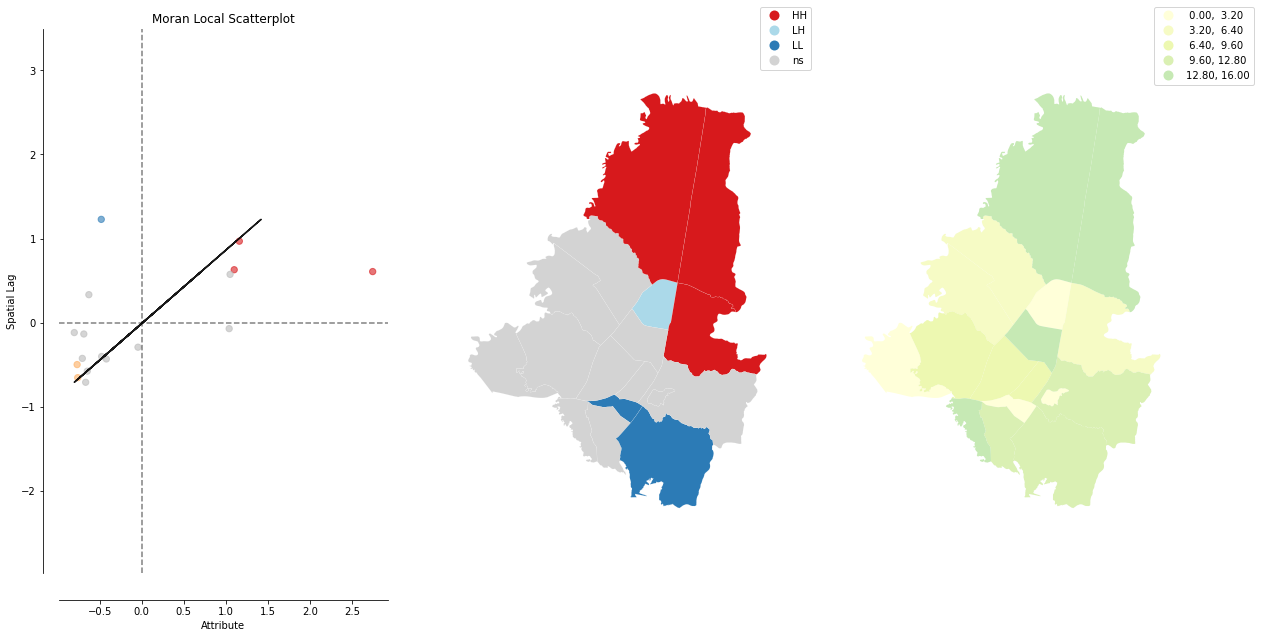

In [29]:
plot_local_autocorrelation(moran_loc = moran_loc, gdf = gdf.copy(),attribute= 'localidad',p=0.05, figsize = (20,10) ) # genera 3 plots, 1.MORAN scatterplot, LISA CLUSTER, LOCAL MORAN REGION)
# plt.title('Autocorrelacion local para enero (MORAN-I)')
plt.show()
# gdf.info()